# CONFIG

In [1481]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import json
import time
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy import NaN
from sklearn.utils import shuffle
from sklearn.model_selection  import train_test_split
df = pd.read_csv("60k.csv")

# TEST DATASET

    - Replace -1 by NaN
    - Remove NaN for essential features
    - Remove duplicates

In [1482]:
df = df.replace(-1, NaN)

In [1483]:
df.dropna(subset='price', inplace = True)
df.dropna(subset='number_of_bedrooms', inplace = True)
df.dropna(subset='surface', inplace = True)
df.drop(df.index[df['type_of_sale'] != 'residential_sale'], inplace=True)
df.drop(df.index[df['subtype_of_property'] == 'APARTMENT_BLOCK'], inplace=True)
del df["type_of_sale"]

# Treat categorical data

In [1484]:
print(df["state_of_the_building"].unique())
percent_missing = df["state_of_the_building"].eq('NO_INFO').sum() * 100 / len(df["state_of_the_building"])
percent_missing


['TO_RENOVATE' 'GOOD' 'AS_NEW' 'NO_INFO' 'TO_BE_DONE_UP' 'JUST_RENOVATED'
 'TO_RESTORE']


26.851501785339213

/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_11035/3439526501.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_h = df[["price", "state_of_the_building"]][df["price"]<600000][df["price"]>20000]
/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_11035/3439526501.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_histo['price'], hist = False, kde = True, label='AS_NEW')
/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_11035/3439526501.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

Text(0, 0.5, 'Count')

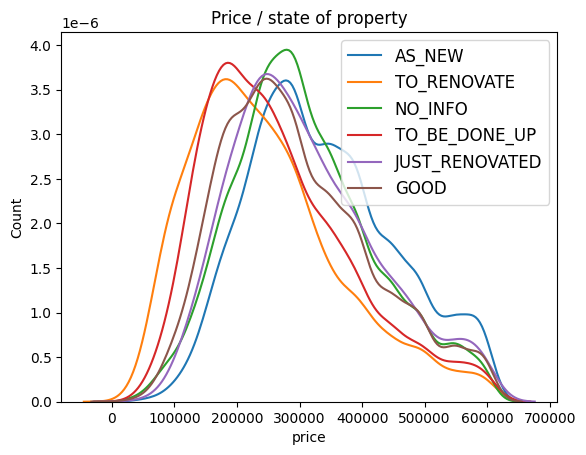

In [1485]:
df_h = df[["price", "state_of_the_building"]][df["price"]<600000][df["price"]>20000]
df_histo = df_h[df_h.state_of_the_building == 'AS_NEW']
sb.distplot(df_histo['price'], hist = False, kde = True, label='AS_NEW')
df_histo2 = df_h[df_h.state_of_the_building == 'TO_RENOVATE']
sb.distplot(df_histo2['price'], hist = False, kde = True, label='TO_RENOVATE')
df_histo3 = df_h[df_h.state_of_the_building == 'NO_INFO']
sb.distplot(df_histo3['price'], hist = False, kde = True, label='NO_INFO')
df_histo4 = df_h[df_h.state_of_the_building == 'TO_BE_DONE_UP']
sb.distplot(df_histo4['price'], hist = False, kde = True, label='TO_BE_DONE_UP')
df_histo5 = df_h[df_h.state_of_the_building == 'JUST_RENOVATED']
sb.distplot(df_histo5['price'], hist = False, kde = True, label='JUST_RENOVATED')
df_histo6 = df_h[df_h.state_of_the_building == 'GOOD']
sb.distplot(df_histo6['price'], hist = False, kde = True, label='GOOD')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Price / state of property')
plt.xlabel('price')
plt.ylabel('Count')  

In [1486]:
#Translate categories into numerical values
#TYPE OF PROPERTY
map_property = {"HOUSE":1, "APARTMENT":0}
df["type_of_property"] = df["type_of_property"].map(map_property).astype(int)
#df["type_of_property"].value_counts

#STATE OF THE BUILDING
map_state = {"GOOD":1, "TO_RENOVATE":0, "AS_NEW":1, "JUST_RENOVATED":1, "TO_RESTORE":0, "NO_INFO":1, "TO_BE_DONE_UP":1}
df["state_of_the_building"] = df["state_of_the_building"].map(map_state).astype(int)
df["state_of_the_building"].value_counts()


1    43541
0     4069
Name: state_of_the_building, dtype: int64

In [1487]:
#Shuffle and create sample for Train_dataset
df = shuffle(df)

df_test, df_train = train_test_split(df,test_size = 0.15)

df_test = df_test.reset_index(drop = True)
df_train = df_train.reset_index(drop = True)

df_test.to_csv("df_test.csv",index = False)
df_train.to_csv("df_train.csv",index = False)

# TRAIN DATASET

- Drop column w.o. price correlation

In [1488]:
del df_train["Unnamed: 0"]
del df_train["id"]
del df_train["postal_code"]
del df_train["locality"]
del df_train["fully_equipped_kitchen"]
del df_train["kitchen_type"]
del df_train["land_surface"]
del df_train["number_of_facades"]
del df_train["garden_surface"]
del df_train["terrace_surface"]
del df_train["furnished"]
del df_train["open_fire"]
del df_train["region"]
del df_train["subtype_of_property"]

- Create province score based on the median price

In [1489]:
# create province & score dictionnary

provinces = list(df_train["province"].unique())

dict_province = {}

for province in provinces : 

    dict_province[province] = df_train[(df_train["province"] == province)]["price"].median()/df_train["price"].median()
 
print(dict_province)

#map dictionnary with province feature with the new province_score column

df_train["province_score"] = df_train["province"].map(dict_province)

#delete province after creating province_score
del df_train["province"]
df_train["province_score"].unique()

{'Flemish Brabant': 1.2520868113522539, 'Antwerp': 1.1318864774624373, 'Hainaut': 0.664440734557596, 'Brussels': 1.2003338898163607, 'East Flanders': 1.1001669449081803, 'West Flanders': 0.9991652754590985, 'Limburg': 1.0350584307178632, 'Luxembourg': 0.9682804674457429, 'Walloon Brabant': 1.2468280467445743, 'Liège': 0.7979966611018364, 'Namur': 0.7846410684474123}


array([1.25208681, 1.13188648, 0.66444073, 1.20033389, 1.10016694,
       0.99916528, 1.03505843, 0.96828047, 1.24682805, 0.79799666,
       0.78464107])

- Replace NaN by 0 for selected features

In [1490]:
df_train["swimming_pool"] = df_train["swimming_pool"].replace(NaN, 0).astype(int)
df_train["garden"] = df_train["garden"].replace(NaN, 0).astype(int)
df_train["terrace"] = df_train["terrace"].replace(NaN, 0).astype(int)

# print(df["swimming_pool"].unique())
# print(df["garden"].unique())
# print(df["terrace"].unique())

- Drop some tricky data in selected features

In [1491]:
df_train.drop(df_train.index[df_train['type_of_property'] == 'HOUSE_GROUP'], inplace=True)
df_train.drop(df_train.index[df_train['type_of_property'] == 'APARTMENT_GROUP'], inplace=True)

# df_train.isnull().sum()
print(df_train["price"].mean())
print(df_train["price"].std())
df_train["price"].max()

411650.6339960795
428800.70529964997


8100000.0

- Remove outliers for price and surface

In [1492]:
#Dropping the outlier rows with standard deviation
factor = 2
upper_lim = df_train['price'].mean() + df_train['price'].std() * factor
df_train = df_train[(df_train['price'] < upper_lim) & (df_train['price'] >= 20000)]

factor = 2
upper_lim1 = df_train['surface'].mean() + df_train['surface'].std() * factor
lower_lim1 = df_train['surface'].mean() - df_train['surface'].std() * factor
df_train = df_train[(df_train['surface'] < upper_lim1) & (df_train['surface'] > lower_lim1)]

factor = 2
upper_lim2 = df_train['number_of_bedrooms'].mean() + df_train['number_of_bedrooms'].std() * factor
lower_lim2 = df_train['number_of_bedrooms'].mean() - df_train['number_of_bedrooms'].std() * factor
df_train = df_train[(df_train['number_of_bedrooms'] < upper_lim2) & (df_train['number_of_bedrooms'] > lower_lim2)]

<AxesSubplot: xlabel='surface', ylabel='price'>

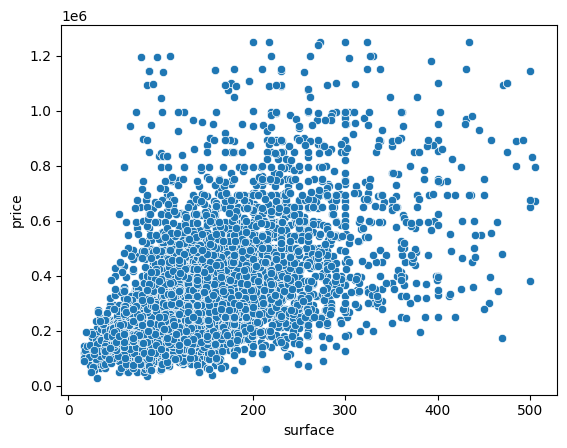

In [1493]:
sb.scatterplot(data=df_train, x = "surface", y = "price")

<AxesSubplot: >

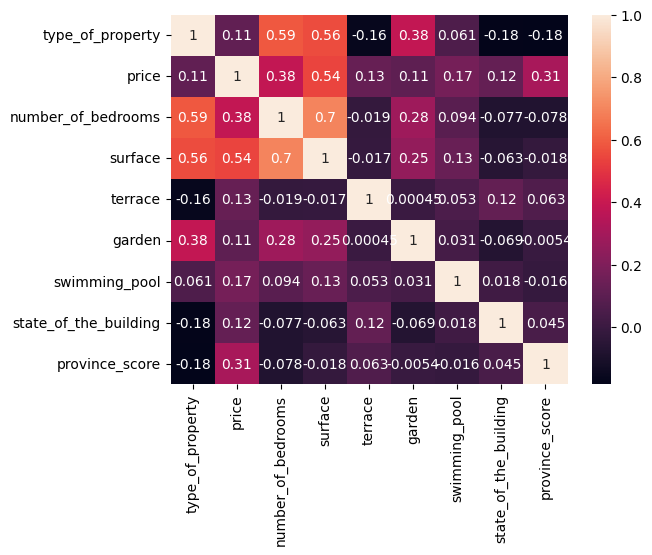

In [1494]:
#del df["id"]
Var_Corr = df_train.corr()
# plot the heatmap and annotation on it
sb.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

# Data standardization

In [1495]:
df_train.columns

Index(['type_of_property', 'price', 'number_of_bedrooms', 'surface', 'terrace',
       'garden', 'swimming_pool', 'state_of_the_building', 'province_score'],
      dtype='object')

In [1496]:
df_train['price'] = (df_train['price'] - df_train['price'].mean()) / df_train['price'].std()
df_train['number_of_bedrooms'] = (df_train['price'] - df_train['price'].mean()) / df_train['price'].std()
df_train['surface'] = (df_train['surface'] - df_train['surface'].mean()) / df_train['surface'].std()
# df_train['province_score'] = (df_train['province_score'] - df_train['province_score'].mean()) / df_train['province_score'].std()

In [1497]:
df_train.to_csv("trained_dataset.csv")